In [23]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [24]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [25]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [26]:
# create database engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [27]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)

# reflect the tables
Base.prepare(autoload_with = engine, reflect = True)


C:\Users\jhaug\AppData\Local\Temp\ipykernel_32720\1520280675.py:6: SAWarning: This declarative base already contains a class with the same class name and module name as sqlalchemy.ext.automap.measurement, and will be replaced in the string-lookup table.
  Base.prepare(autoload_with = engine, reflect = True)
C:\Users\jhaug\AppData\Local\Temp\ipykernel_32720\1520280675.py:6: SAWarning: This declarative base already contains a class with the same class name and module name as sqlalchemy.ext.automap.station, and will be replaced in the string-lookup table.
  Base.prepare(autoload_with = engine, reflect = True)


In [28]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [29]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [30]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [31]:
### 3 - 02 SQLAlchemy, Sqlite, and Dates

######### Need to determine which table has dates for below
from sqlalchemy import inspect

inspector = inspect(engine)
inspector.get_table_names()

# Get a list of column names and types
columns = inspector.get_columns('Measurement')
for c in columns:
    print(c['name'], c["type"])
# columns


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [32]:
### 3 - 02 SQLAlchemy, Sqlite, and Dates

# Get a list of column names and types
columns = inspector.get_columns('Station')
for c in columns:
    print(c['name'], c["type"])


id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [33]:
# Find the most recent date in the data set.
######### From above, Measurement table has the dates
session.query(Measurement.date).order_by(Measurement.date.desc()).first()


('2017-08-23',)

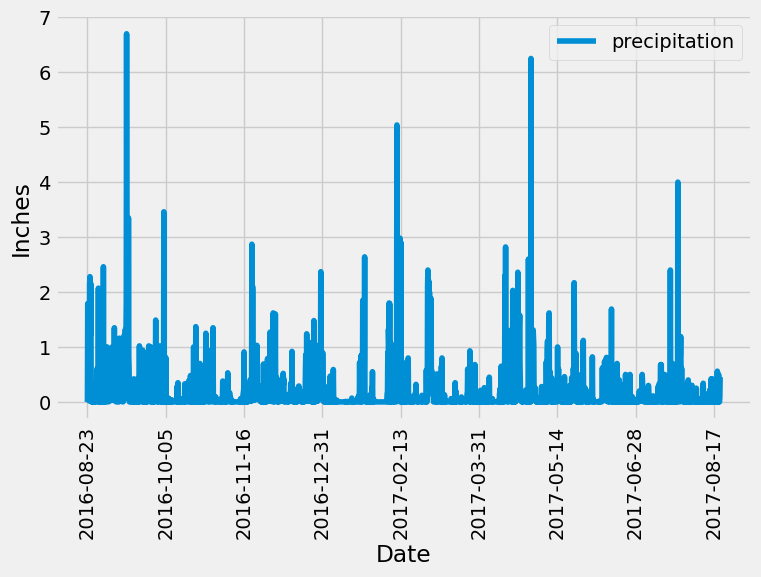

In [40]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

# Calculate the date one year from the last date in data set.
query_one_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
# For histogram in Challenge shows one year
query_results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= query_one_year)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df_query_results = pd.DataFrame(query_results)
df_query_results = df_query_results.rename(columns = {"prcp" : "Inches"})

# Sort the dataframe by date
df_query_results = df_query_results.sort_values("date") 
df_date_index = df_query_results.set_index("date").dropna() # setting date as index & droppojng multiple "NaN"s

# Use Pandas Plotting with Matplotlib to plot the data
df_date_index.plot(rot = 90, figsize = (8,5))
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend(["precipitation"], loc = "upper right")

# ax.xaxis.grid(True, which='minor', linestyle='-', linewidth = 0.25)
# xticks = np.arange(query_one_year, 40)

plt.show()

In [ ]:
# Use Pandas to calculate the summary statistics for the precipitation data
df_query_results.describe()

# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number of stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Climate App Design

In [ ]:
# Start at the homepage
# List all the available routes

/

In [ ]:
# Convert the query results from your precipitation analysis (i.e. retrieve only the last 12 months of data) to a dictionary
# using <date> as the key and <prcp> as the value
# Return the JSON representation of your dictionary

/api/v1.0/precipitation

In [ ]:
# Return a JSON list of stations from the dataset

//api/v1.0/stations

In [ ]:
# Query the dates and temperature observations of the most-active station for the previous year of data
# Return a JSON list of temperature observations for the previous year

/api/v1.0/tabs

In [ ]:
# Return a JSON list of the minimum temperature, the average temperature, and the maximum temperature
# for a specified start or start-end range
# For a specified start, calculate <TMIN>, <TAVG>, and <TMAX> for all the dates greater than or equal to the start date.
# For a specified start date and end date, calculate <TMIN>, <TAVG>, and <TMAX> for the dates 
# from the start date to the end date, inclusive

/api/v1.0/<start>


/api/v1.0/<end>

# Close Session

In [ ]:
# Close Session
session.close()